# Notebook Dedicated to Observe the Internal Correlation of Trained Models

In [1]:
#import uproot
import numpy as np

import pickle
 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import font_manager

import seaborn as sn
import pandas as pd

import tensorflow as tf

In [4]:
from tensorflow.keras.utils import register_keras_serializable

@register_keras_serializable(package="Custom", name="PixelHintInitializer")
class PixelHintInitializer(tf.keras.initializers.Initializer):
    def __init__(self, weights_hint):
        self.weights_hint = np.array(weights_hint)

    def __call__(self, shape, dtype=None):
        W = np.tile(self.weights_hint.reshape(-1, 1), (1, shape[1]))
        return tf.convert_to_tensor(W, dtype=dtype)

    def get_config(self):
        return {"weights_hint": self.weights_hint.tolist()}

# Load The Model

In [5]:
# ========== Define the cuts used to build the model ==========
energy_inf_cut = 2.5
energy_sup_cut = 7

posr_cut = 5500

time_res_inf_cut = -1
time_res_sup_cut = 5

nhits_cut = 20

# ========== Load The Model ==========
file_dir = 'C:/Users/joanc/jupyter notebooks/solar neutrino analysis/Machine Learning/TensorFlow Frame/Sequential Models/models save/10x10/optimized models/pipeline_std_minmax/'
model_name = f'Seq_MLM1_E_{energy_inf_cut}_{energy_sup_cut}_MeV_R_{posr_cut}_mm_Delta_{time_res_inf_cut}_{time_res_sup_cut}_ns'

model = tf.keras.models.load_model(file_dir + model_name + '.keras', custom_objects={"gelu": tf.keras.activations.gelu})
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ imag_ly_0 (Dense)             │ (None, 94)                │           9,494 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ energy_input (InputLayer)     │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ position_input (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 96)                │               0 │ imag_ly_0[0][0],           │
│                               │                           │                 │ energy_input[0][0],        │
│                               │                           │                 │ position_input[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bdo_ly_0 (Dense)              │ (None, 29)                │           2,813 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bdo_ly_1 (Dense)              │ (None, 24)                │             720 │ bdo_ly_0[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 24)                │               0 │ bdo_ly_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ado_ly_0 (Dense)              │ (None, 14)                │             350 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ nu_predict (Dense)            │ (None, 2)                 │              30 │ ado_ly_0[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 40,223 (157.12 KB)

 Trainable params: 13,407 (52.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,816 (104.75 KB)

# Extract Weights Between Input Layers and 1st Hidden Layers

In [20]:
model.layers

[<InputLayer name=image_input, built=True>,
 <Dense name=imag_ly_0, built=True>,
 <InputLayer name=energy_input, built=True>,
 <InputLayer name=position_input, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=bdo_ly_0, built=True>,
 <Dense name=bdo_ly_1, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=ado_ly_0, built=True>,
 <Dense name=nu_predict, built=True>]

In [36]:
pixel_weight, _ = model.layers[1].get_weights()

energy_weight, _ = model.layers[5].get_weights()
energy_weight = energy_weight[-2]

position_weight, _ = model.layers[5].get_weights()
position_weight = position_weight[-1]

In [80]:
energy_weight

array([-1.1612718 ,  0.25277478, -1.0285641 , -0.35827243, -1.9467006 ,
       -1.8083771 ,  1.9313931 , -1.4968842 , -0.7992974 ,  0.4145802 ,
        1.5050818 , -1.3283464 ,  1.8658454 ,  1.6215969 ,  2.1102495 ,
        1.5874193 , -1.3931837 ,  0.55888   , -1.1395379 , -1.854438  ,
        1.9863498 ,  0.24854702, -2.0453036 ,  1.2949345 ,  0.6233783 ,
       -1.9542094 ,  1.831029  , -1.2459092 ,  1.5957104 ], dtype=float32)

## Weight Information Reduction

### Weight Values Sum

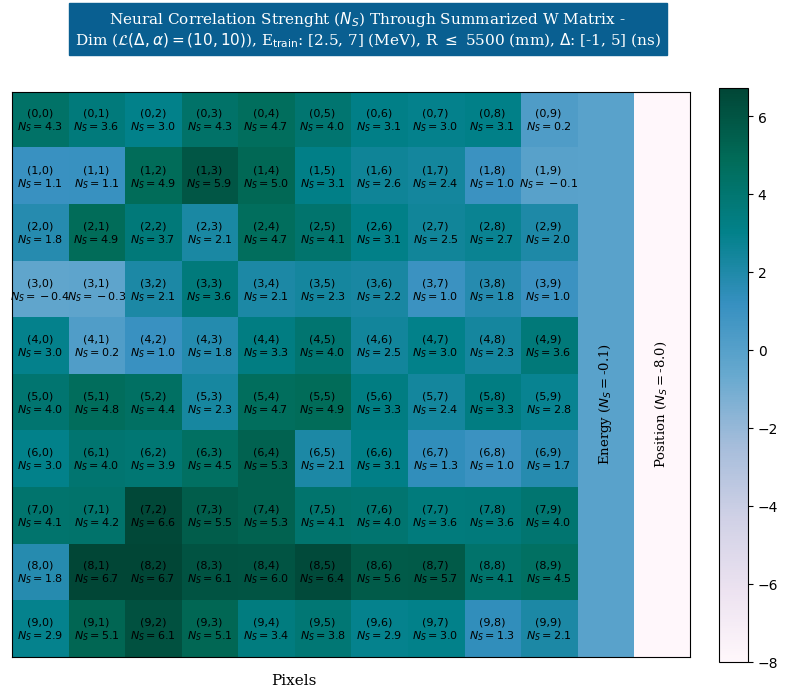

In [167]:
# Extract Data
pixel_weight_sum = np.sum(pixel_weight, axis = 1)
pixel_matrix_weight = pixel_weight_sum.reshape(10,10)

energy_weight_sum = np.sum(energy_weight)
energy_extent = np.ones(pixel_matrix_weight.shape[0])*energy_weight_sum

position_weight_sum = np.sum(position_weight)
position_extent = np.ones(pixel_matrix_weight.shape[0])*position_weight_sum

full_weight_matrix = np.column_stack((pixel_matrix_weight, energy_extent, position_extent))

# -------- Plot Setting --------
sn.reset_orig

# Save Settings:
save_fig = True
save_dir = 'figs/Optimized Models/10x10/pipeline_std_minmax/'
fname = f'model_neural_correlation_'
pattern_train_save_name = f'E_{energy_inf_cut}_{energy_sup_cut}_MeV_R_{posr_cut}_mm_Delta_({time_res_inf_cut}_{time_res_sup_cut})_ns'

# Superior Title 
main_title = r'Neural Correlation Strenght ($N_S$) Through Summarized W Matrix - '
train_cut_title = rf'Dim ($\mathcal{{L}}(\Delta, \alpha) = (10,10)$), E$_\text{{train}}$: [{energy_inf_cut}, {energy_sup_cut}] (MeV), R $\leq$ {posr_cut} (mm), $\Delta$: [{time_res_inf_cut}, {time_res_sup_cut}] (ns)'
full_title = main_title + '\n' + train_cut_title

fig, ax = plt.subplots(figsize=(9.5,9.5))

im = plt.imshow(full_weight_matrix, cmap = cm.PuBuGn)

# --- XY Lables ---

ax.set_xticks([])
ax.set_xticklabels([])

ax.set_yticks([])
ax.set_yticklabels([])

# --- Color bar ---
cbar = plt.colorbar(im, ax=ax, fraction=0.039, pad=0.04)

# Anotate the coordinate position of the pixels
for i in range(pixel_matrix_weight.shape[0]):
    for j in range(pixel_matrix_weight.shape[1]):
        ax.text(j, i, f"({i},{j})" + '\n' + f'$N_S = {pixel_matrix_weight[i][j]:.1f}$',
                ha="center", va="center",
                color="black", fontsize=8)

# --- Pixel x-axis Label ---
x_center_pixels = pixel_matrix_weight.shape[1] / 2 - 0.5  # centered
ax.text(x_center_pixels, pixel_matrix_weight.shape[0] - 0.1, "Pixels",
        ha="center", va="center",
        color="black", fontsize=11, family='serif', fontweight="normal")

# --- Anotate the energy and position label ---
y_center = pixel_matrix_weight.shape[0] / 2
ax.text(10, y_center, f"Energy ($N_S = ${energy_weight_sum:.1f})",
            ha="center", va="center",
            color="black", fontsize=9.5, rotation=90, family = 'serif', fontweight="normal")

ax.text(11, y_center, f"Position ($N_S = ${position_weight_sum:.1f})",
            ha="center", va="center",
            color="black", fontsize=9.5, rotation=90, family = 'serif', fontweight="normal")

plt.suptitle(full_title, backgroundcolor='#095f91', family = 'serif', color='white', fontsize=11, weight='normal', y = 0.88)

if save_fig:
    plt.savefig(save_dir + fname + pattern_train_save_name + '.png', format = 'png' , dpi=300, bbox_inches='tight')

plt.show()